<a href="https://colab.research.google.com/github/TheBoatyMcBoatFace/MLness/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Unsupervised Learning - Machine Learning

Objective of this K means Clustering algorithm is to identify clusters for an original image, compress it and then recover the Image back post compression using clusters and its index(centroids)

K Means Clustering YouTube - https://www.youtube.com/watch?v=yR7k19YBqiw

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [ ]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

Load Matlab file, initialize initial centroids, and find each of its closest index

In [ ]:
data = loadmat('ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [ ]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()

    return centroids

Calculate centroids for 3 (k) clusters

In [ ]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [ ]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

Run K means algorithm

In [ ]:
idx, centroids = run_k_means(X, initial_centroids, 10)

Plot a graph of 3(k) clusters with separate colors

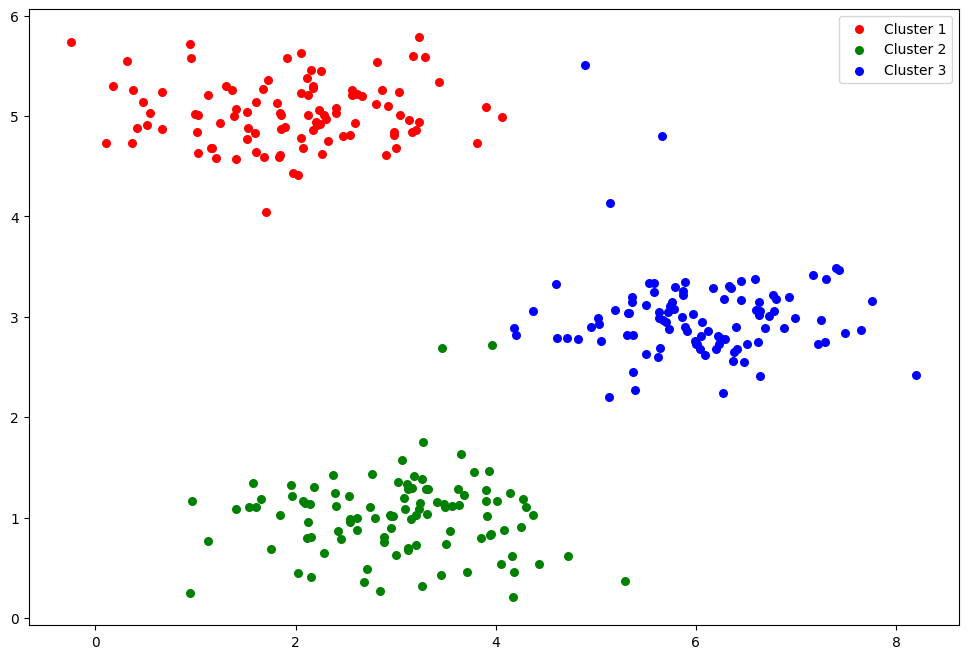

In [ ]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

Define initialization of centroids using zeroes and index of each with random integer

In [ ]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i,:] = X[idx[i],:]

    return centroids

Initialize centroids for 3 (k) clusters

In [ ]:
init_centroids(X, 3)

array([[4.27783068, 1.1801368 ],
       [2.80996442, 5.53849899],
       [2.32558253, 4.74867962]])

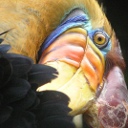

In [ ]:
from IPython.display import Image
Image(filename='bird_small.png')

In [ ]:
image_data = loadmat('bird_small.mat')
image_data

In [ ]:
A = image_data['A']
A.shape

(128, 128, 3)

Feature normalization of Data/Image

In [ ]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

Initialize centroids for 16(k) clusters for Image data, Run K means algorithm on 10 (k) clusters, find index of closest centroid for each cluster identified and recover shape from each centroid

In [ ]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [ ]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

Plot the image back using recovered shape

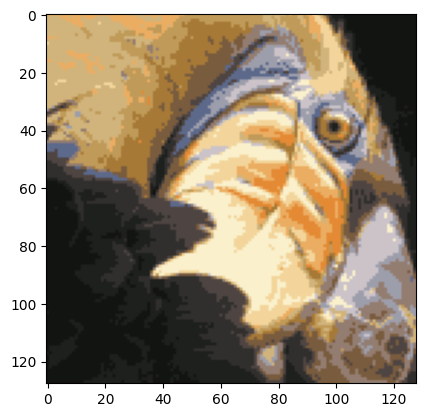

In [ ]:
plt.imshow(X_recovered)

Reference - https://github.com/jdwittenauer/ipython-notebooks